## Automatic Differentiation
### A simple Example

In [49]:
import torch
from d2l.torch import size
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [50]:
x.requires_grad_(True) # Same as `x = torch.arange(4.0, requires_grad=True)`
x.grad

In [51]:
y = 2 * torch.dot(x,x) # x^t *x
y

tensor(28., grad_fn=<MulBackward0>)

In [52]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [53]:
x.grad == 4 * x

tensor([True, True, True, True])

In [54]:
# 计算另一个方程的x,清理之前的梯度信息
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### Backward for Non-Scalar Variables


In [55]:
x.grad.zero_()
y = x * x
# y.backward(torch.ones(len(x))) 和下面是一样的
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### Detaching Computation

In [56]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad,u


(tensor([0., 1., 4., 9.]), tensor([0., 1., 4., 9.]))

In [57]:
x.grad.zero_()
y = x * x
# u = y.detach()
z = y * x

z.sum().backward()
x.grad,y

(tensor([ 0.,  3., 12., 27.]),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>))

In [58]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [59]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x


tensor([True, True, True, True])

### computing the Gradient of Python Control Flow

In [60]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [62]:
a = torch.randn(1,requires_grad=True)
d = f(a)
d.backward()

In [63]:
a.grad, d / a

(tensor([8192.]), tensor([8192.], grad_fn=<DivBackward0>))

### Exercise
1. Why is the second derivative much more expensive to compute than the first derivative?
2. After running the function for backpropagation, immediately run it again and see what happens.
3. In the control flow example where we calculate the derivative of d with respect to a, what would happen if we changed the variable a to a random vector or matrix. At this point, the result of the calculation f(a) is no longer a scalar. What happens to the result? How do we analyze this?
4. Redesign an example of finding the gradient of the control flow. Run and analyze the result.
5. 函数$f(x)=sin(x)$,画出$f(x)和\frac{df(x)}{dx}$的图像,后者是在没有利用$f'(x)= cos(x)$

In [67]:
# 2
a = torch.randn(1,requires_grad=True)
d = f(a)
d.backward()

In [68]:
# d.backward()
'''
再次运行backward()会报错
Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.
'''

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

In [84]:
# 3 需要指定反向梯度传播输出的形式
a = torch.randn(6,requires_grad=True)
d = f(a)
d.sum().backward() #
a.grad, d / a

(tensor([51200., 51200., 51200., 51200., 51200., 51200.]),
 tensor([51200.0000, 51200.0039, 51200.0000, 51200.0000, 51200.0000, 51200.0000],
        grad_fn=<DivBackward0>))

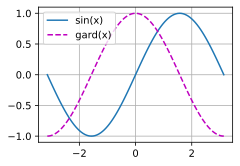

In [66]:
import numpy as np
from d2l import torch as d2l
# 5
x = np.linspace(-np.pi, np.pi, 100)
x = torch.tensor(x, requires_grad=True)
y = torch.sin(x)
y.sum().backward()
y_1 = x.grad
d2l.plot(x.detach(),[y.detach(),y_1],legend=['sin(x)','gard(x)'])